*Eduardus Tjitrahardja | @edutjie | 2022*

# Assignment 2: The Boston Housing

- Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1):
  - **CRIM** - per capita crime rate by town
  - **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
  - **INDUS** - proportion of non-retail business acres per town.
  - **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
  - **NOX** - nitric oxides concentration (parts per 10 million)
  - **RM** - average number of rooms per dwelling
  - **AGE** - proportion of owner-occupied units built prior to 1940
  - **DIS** - weighted distances to five Boston employment centres
  - **RAD** - index of accessibility to radial highways
  - **TAX** - full-value property-tax rate per $10,000
  - **PTRATIO** - pupil-teacher ratio by town
  - **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
  - **LSTAT** - % lower status of the population
  - **MEDV** - Median value of owner-occupied homes in $1000's
  
- Prediction Target: **MEDV**

## Import Libraries

In [731]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Dataset

In [732]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('../data/housing.csv', names=cols, header=None, delimiter=r"\s+")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [734]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [735]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

## EDA

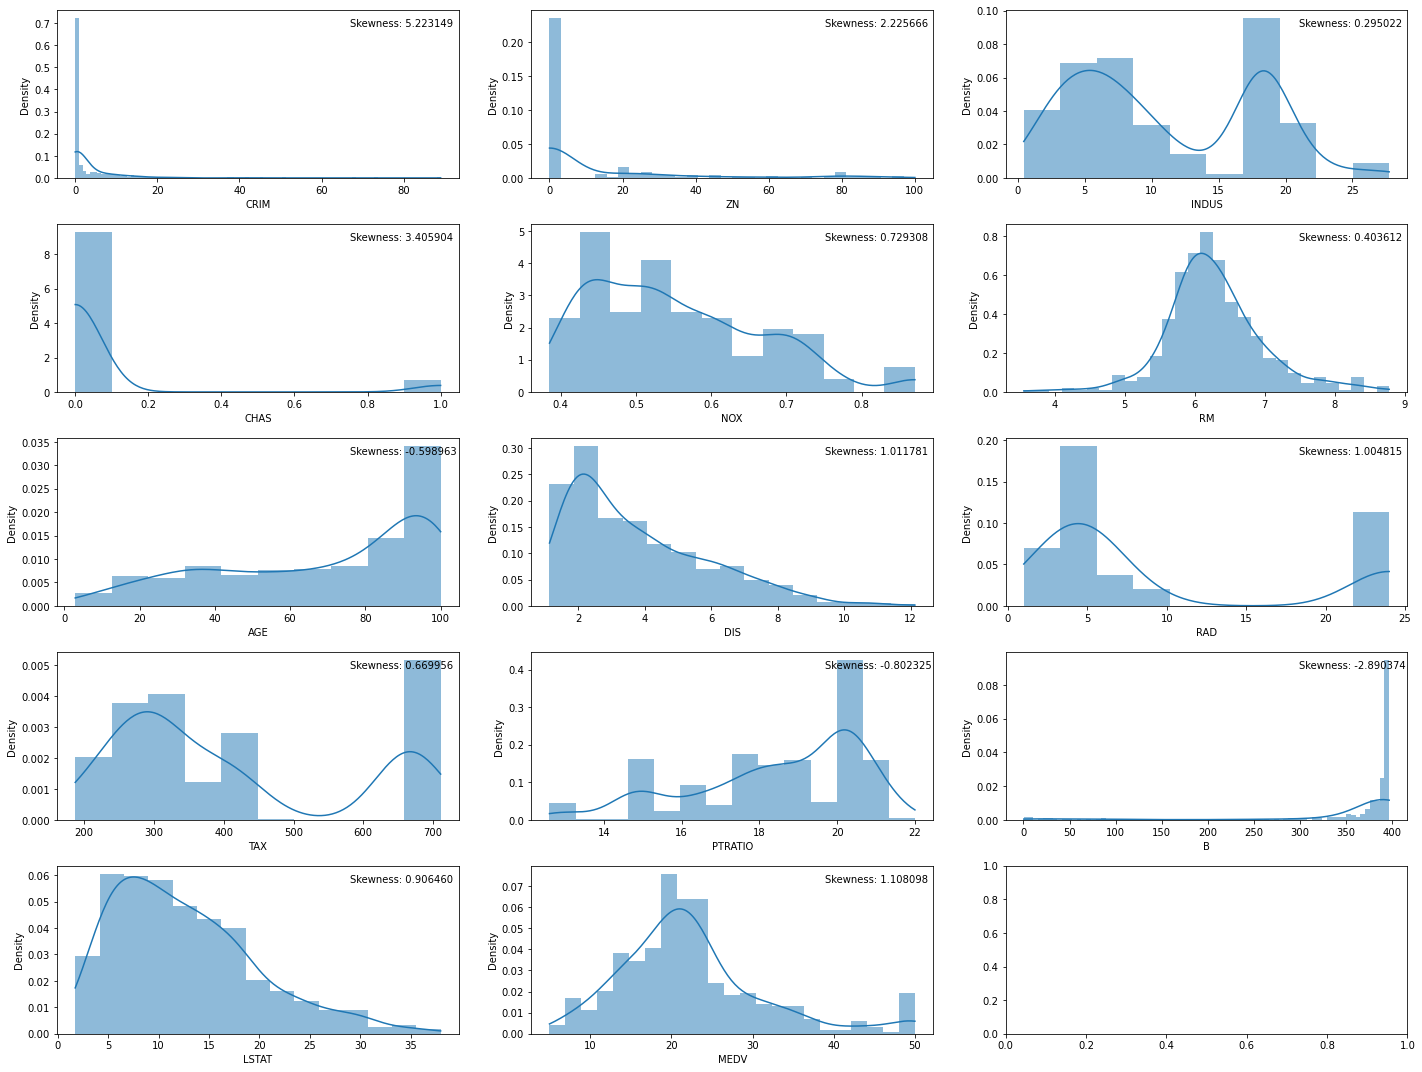

In [736]:
fig, axes = plt.subplots(5, 3, figsize=(20, 15))
for i, col in enumerate(df.columns.to_list()):
    sns.histplot(df[col], ax=axes[i // 3, i % 3], kde=True, stat="density", linewidth=0)
    axes[i // 3, i % 3].text(
        x=0.73,
        y=0.9,
        transform=axes[i // 3, i % 3].transAxes,
        s="Skewness: %f" % df.iloc[:, i].skew(),
    )
plt.tight_layout()

**Observations:**
- CHAS is categorical nominal
- CRIM, ZN, DIS, LSTAT is right skewed
- B is left skewed
- INDUS, RAD, TAX have bimodel distribution
- The rest have quite normal distribution

In [737]:
df.RAD.value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

RAD is categorical ordinal

In [738]:
cat_cols = ['CHAS', 'RAD']
num_cols = list(set(df.columns.to_list()) - set(cat_cols))

print(cat_cols, len(cat_cols))
print(num_cols, len(num_cols))

['CHAS', 'RAD'] 2
['ZN', 'DIS', 'PTRATIO', 'TAX', 'LSTAT', 'MEDV', 'CRIM', 'NOX', 'AGE', 'INDUS', 'B', 'RM'] 12


### Check Outliers

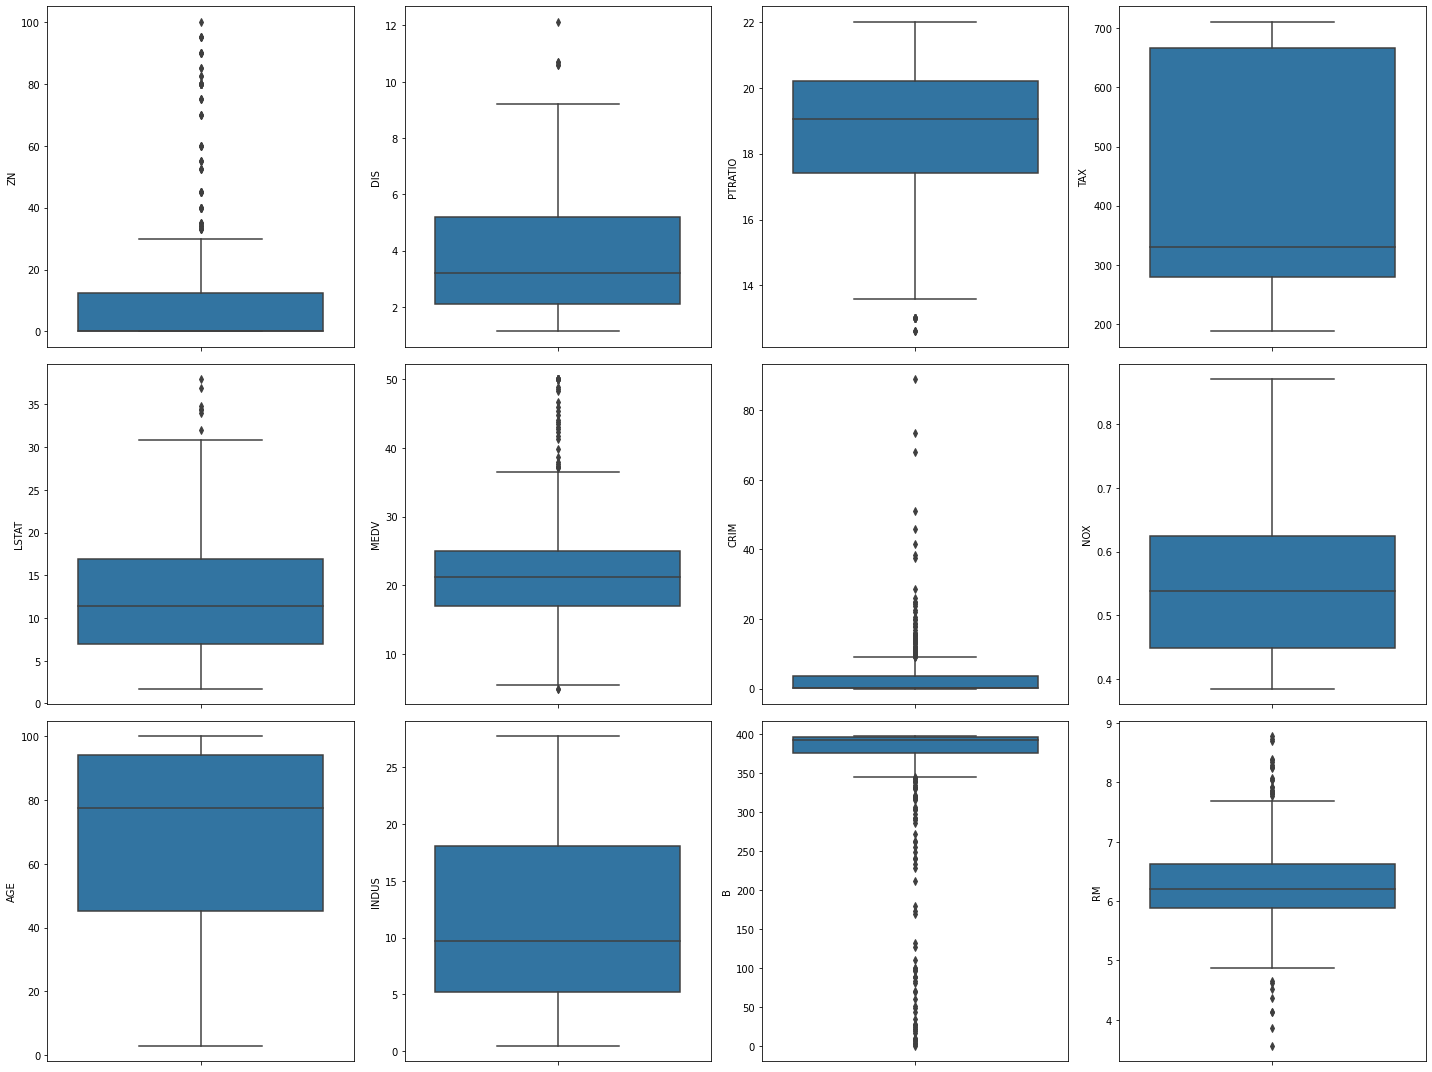

In [739]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
for i, col in enumerate(num_cols):
    sns.boxplot(y=col, data=df, ax=axes[i // 4, i % 4], orient="v")
plt.tight_layout()

**Observations:**
- **LSTAT, ZN, RM, PTRATIO, CRIM, MEDV, DIS, B** seems to have outliers

In [740]:
outliers_index = []
for col in set(num_cols)-{'MEDV'}:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - (1.5 * iqr)) | (df[col] > q3 + (1.5 * iqr))]
    outliers_index.extend(outliers.index.to_list())
    outliers_percentage = (len(outliers.index.to_list()) / len(df)) * 100
    if outliers_percentage > 0:
        print(f"{col} Outliers Percentage: {round(outliers_percentage, 2)}%")

ZN Outliers Percentage: 13.44%
DIS Outliers Percentage: 0.99%
PTRATIO Outliers Percentage: 2.96%
LSTAT Outliers Percentage: 1.38%
RM Outliers Percentage: 5.93%
CRIM Outliers Percentage: 13.04%
B Outliers Percentage: 15.22%


In [741]:
outliers_counter = {i: outliers_index.count(i) for i in set(outliers_index)}
print(outliers_counter)

{18: 1, 25: 1, 27: 1, 32: 1, 34: 1, 39: 1, 40: 1, 54: 1, 55: 1, 56: 1, 57: 1, 65: 1, 66: 1, 97: 1, 98: 1, 102: 1, 118: 1, 134: 1, 141: 1, 145: 1, 146: 1, 151: 1, 152: 1, 153: 1, 154: 1, 155: 1, 156: 1, 160: 1, 162: 1, 163: 1, 165: 1, 166: 1, 167: 1, 168: 1, 169: 1, 170: 1, 180: 1, 186: 1, 187: 1, 188: 1, 189: 1, 190: 1, 191: 1, 192: 1, 193: 1, 194: 1, 195: 2, 196: 2, 197: 2, 198: 2, 199: 1, 200: 1, 201: 1, 202: 1, 203: 2, 204: 2, 224: 1, 225: 1, 226: 1, 232: 1, 233: 1, 253: 1, 254: 1, 255: 1, 256: 1, 257: 2, 258: 1, 259: 1, 260: 1, 261: 1, 262: 2, 263: 1, 264: 1, 265: 1, 266: 1, 267: 2, 268: 1, 274: 1, 275: 1, 276: 1, 277: 1, 278: 1, 280: 1, 283: 2, 284: 1, 285: 1, 286: 2, 287: 1, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 298: 1, 299: 1, 300: 1, 301: 1, 302: 1, 303: 1, 304: 1, 305: 1, 306: 1, 307: 1, 331: 1, 332: 1, 341: 1, 343: 1, 344: 1, 347: 1, 348: 1, 349: 1, 350: 1, 351: 2, 352: 2, 353: 2, 354: 2, 355: 2, 364: 1, 365: 1, 366: 1, 367: 3, 371: 1, 373: 2, 374: 3, 375: 1, 376: 1, 377: 1

#### Drop Outliers

In [742]:
print("Shape before dropping outliers:", df.shape)
# df.drop([key for key, val in outliers_counter.items() if val >= 2], axis=0, inplace=True)
df = df[df.MEDV < 50] # drop outliers where MEDV > 50 because data that's above 50 are all censored as 50
print("Shape after dropping outliers:", df.shape)

Shape before dropping outliers: (506, 14)
Shape after dropping outliers: (490, 14)


### Fix Skewness

In [743]:
skewed_cols = [col for col in set(num_cols) - {"MEDV"} if abs(df[col].skew()) > 0.8]
skewed_cols

['ZN', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'B']

In [744]:
for col in skewed_cols:
    df[col] = np.log1p(df[col])

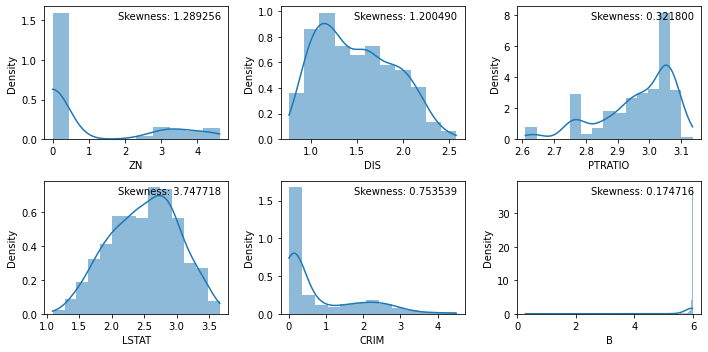

In [745]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
for i, col in enumerate(skewed_cols):
    sns.histplot(df[col], ax=axes[i // 3, i % 3], kde=True, stat="density", linewidth=0)
    axes[i // 3, i % 3].text(
        x=0.4,
        y=0.9,
        transform=axes[i // 3, i % 3].transAxes,
        s="Skewness: %f" % df.iloc[:, i].skew(),
    )
plt.tight_layout()

### Check Correlations

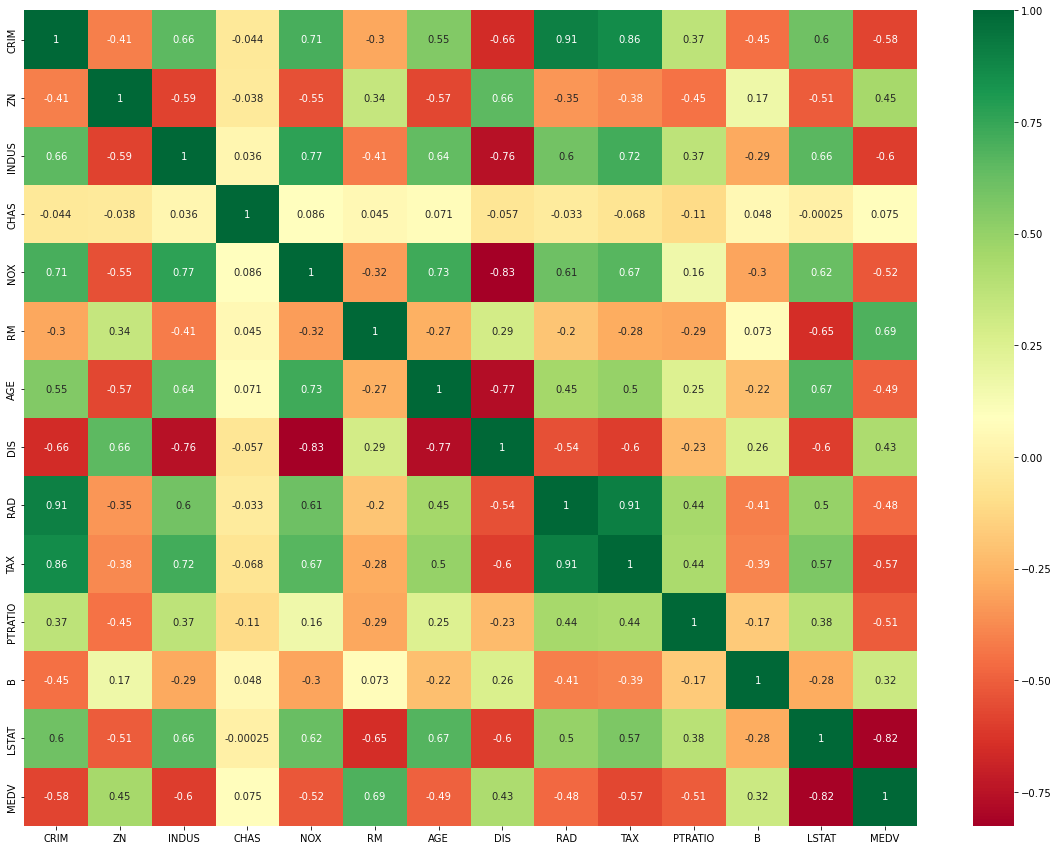

In [746]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

**Observations:**
- TAX and RAD, TAX and CRIM, RAD and CRIM have very high correlation so there's multicorrelation
- LSTAT has very high correlation with MEDV
- PTRATIO,TAX, RM, NOX, INDUS, CRIM, MEDV also have decent correlation with MEDV

In [747]:
# sns.pairplot(df, palette="RdYlGn")
# plt.show()

## Data Preprocessing

In [748]:
from sklearn.preprocessing import MinMaxScaler

In [749]:
mx = MinMaxScaler()

In [750]:
# selected_cols = ['LSTAT', 'PTRATIO','TAX', 'RM', 'NOX', 'INDUS', 'CRIM', 'MEDV']
selected_cols = [col for col in df.columns.to_list() if abs(df[col].corr(df.MEDV)) > 0.4]
# for e in ['TAX', 'RAD']:
#     selected_cols.remove(e)
selected_cols.remove('ZN')
scaled_df = pd.DataFrame(mx.fit_transform(df[selected_cols]), columns=selected_cols, index=df.index)
scaled_df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.000000,0.058148,0.314815,0.577505,0.641607,0.478107,0.000000,0.208015,0.344665,0.270919,0.433790
1,0.004594,0.234444,0.172840,0.547998,0.782698,0.565690,0.043478,0.104962,0.616239,0.476323,0.378995
2,0.004590,0.234444,0.172840,0.694386,0.599382,0.565690,0.043478,0.104962,0.616239,0.203626,0.678082
3,0.005688,0.053333,0.150206,0.658555,0.441813,0.658514,0.086957,0.066794,0.705237,0.108624,0.648402
4,0.013458,0.053333,0.150206,0.687105,0.528321,0.658514,0.086957,0.066794,0.705237,0.293044,0.712329


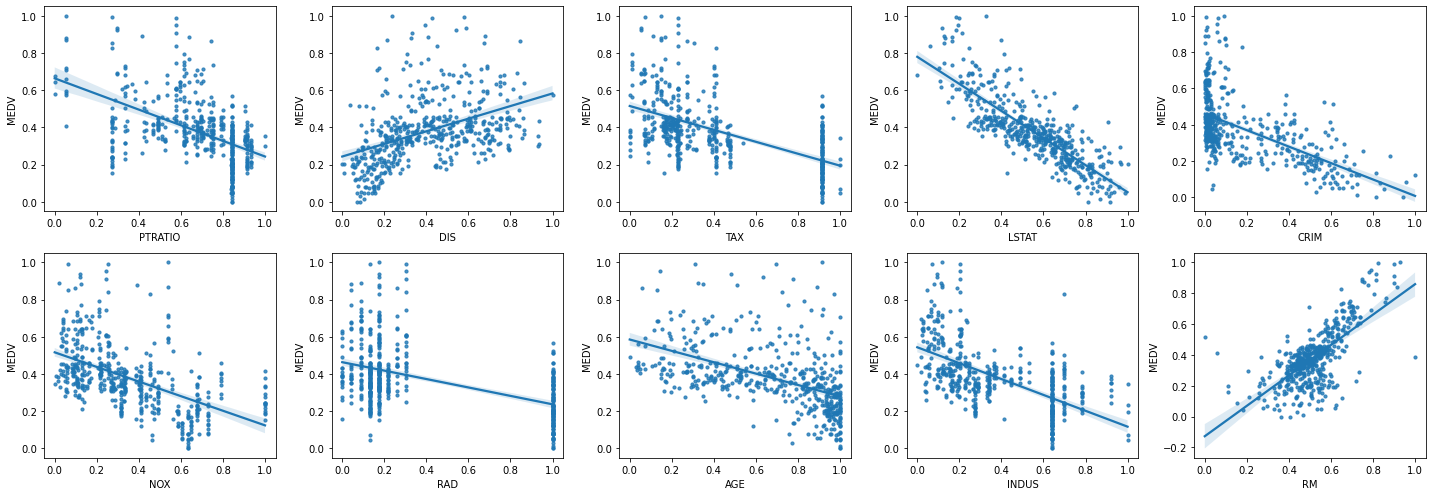

In [751]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7))
for i, col in enumerate(set(selected_cols) - {'MEDV'}):
    sns.regplot(x=col, y="MEDV", data=scaled_df, ax=axes[i // 5, i % 5], scatter_kws={"s": 10})
plt.tight_layout()

## Model Data

In [752]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [753]:
lr = LinearRegression()

In [754]:
X = scaled_df.drop("MEDV", axis=1)
y = scaled_df["MEDV"]

X.shape, y.shape

((490, 10), (490,))

In [755]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((343, 10), (147, 10), (343,), (147,))

In [756]:
lr.fit(X_train, y_train)

y_test_pred = lr.predict(X_test)
print(y_test_pred)

[ 0.18968611  0.4437317   0.2750935   0.13509401  0.1461336   0.33164463
  0.14846612  0.71295864  0.32693244  0.52207218  0.32882649  0.35642698
  0.09193906  0.23783238  0.23792148  0.47586439  0.2558475   0.2295273
  0.18254098  0.39360413  0.36359138  0.44251455  0.12256473  0.57373647
  0.39345911  0.41101164  0.32937442  0.67501316  0.68581761  0.23064639
  0.46779964  0.26692922  0.48970824  0.45126303  0.19449543  0.44250916
  0.58367718  0.38053126  0.62922989  0.53435722  0.22692025  0.29536668
  0.23583081  0.28747977  0.29361248  0.49741006  0.26793578  0.23365308
  0.35371804  0.32504486  0.2309399   0.57096314  0.57275965  0.3502371
  0.28928337  0.48462844  0.25122839  0.53513654  0.39394075  0.16478411
  0.41276532  0.26954852  0.40750388  0.41337039  0.41195305  0.77912887
  0.49656004  0.50411033  0.14505866  0.34658874  0.21229311  0.37539351
  0.27220651  0.34722852  0.21168668  0.40366258  0.41090442  0.32587441
  0.47718738  0.27816669  0.46319538  0.51261647  0.0

In [757]:
lr.score(X_test, y_test)

0.7896497407582201

In [758]:
from sklearn.metrics import mean_squared_error, r2_score

In [759]:
print("R2: ", r2_score(y_test, y_test_pred))
print("MSE: ", mean_squared_error(y_test, y_test_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2:  0.7896497407582201
MSE:  0.00575728015231205
RMSE:  0.07587674315830939
